In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
my_seed = 42
split_proportion = 0.1
batch_size = 4
number_epochs = 50
lr = 1e-2

figure_count = 0
figure_dir = os.path.join("..", "assets")
if os.path.exists(figure_dir):
    pass
else:
    os.mkdir(figure_dir)

train_new = True

print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

In [ ]:
input_dir = os.path.join("..", "input", "27-class-sign-language-dataset")

x_filename = os.path.join(input_dir, "X.npy")
y_filename = os.path.join(input_dir, "Y.npy")

x = np.load(x_filename)
y = np.load(y_filename)

split_number = int(split_proportion * x.shape[0])

np.random.seed(my_seed)
np.random.shuffle(x)
val_x = tf.convert_to_tensor(x[:split_number])
test_x = tf.convert_to_tensor(x[split_number:2*split_number])
train_x = tf.convert_to_tensor(x[2*split_number:])

np.random.seed(my_seed)
np.random.shuffle(y)
val_y_labels = tf.convert_to_tensor(y[:split_number])
test_y_labels = tf.convert_to_tensor(y[split_number:2*split_number])
train_y_labels = tf.convert_to_tensor(y[2*split_number:])

In [ ]:
print(x.shape)
print(x.type)

In [ ]:
# visualize images with labels

fig, ax = plt.subplots(3,3, figsize=(8,8))
for count, x_index in enumerate(np.random.randint(0, train_x.shape[0], size=(9,))):

    cx = count // 3
    cy = count % 3
    ax[cx,cy].imshow(train_x[x_index])
    ax[cx,cy].set_title(f"label: {train_y_labels[x_index]}")
    ax[cx,cy].set_yticklabels("")
    ax[cx,cy].set_xticklabels("")
    
plt.savefig(os.path.join(figure_dir, "figure_{figure_count}.png"))
figure_count += 1
plt.tight_layout()
plt.show()

In [ ]:
label_dict = {}

for number, label in enumerate(np.unique(train_y_labels)):
    label_dict[number] = label

print(label_dict)

In [ ]:
reverse_label_dict = {}
for key in label_dict.keys():
    reverse_label_dict[label_dict[key]] = key
    
print(reverse_label_dict)

In [ ]:
np_train_y = np.zeros_like(train_y_labels) # , dtype=tf.int32)
np_val_y = np.zeros_like(val_y_labels)
np_test_y = np.zeros_like(test_y_labels)

for ii in range(np_train_y.shape[0]):
    np_train_y[ii] = reverse_label_dict[train_y_labels[ii].numpy()[0]]
    
for ii in range(np_val_y.shape[0]):
    np_val_y[ii] = reverse_label_dict[val_y_labels[ii].numpy()[0]]
    
for ii in range(np_test_y.shape[0]):
    np_test_y[ii] = reverse_label_dict[test_y_labels[ii].numpy()[0]]
    
train_y = tf.convert_to_tensor(np_train_y.reshape(-1), dtype=tf.int32)
val_y = tf.convert_to_tensor(np_val_y.reshape(-1), dtype=tf.int32)
test_y = tf.convert_to_tensor(np_test_y.reshape(-1), dtype=tf.int32)

In [ ]:
print(test_y.shape)

In [ ]:
print(val_y_labels)

In [ ]:
# visualize images with labels

fig, ax = plt.subplots(3,3, figsize=(8,8))
for count, x_index in enumerate(np.random.randint(0, val_x.shape[0], size=(9,))):

    cx = count // 3
    cy = count % 3
    idx = val_y[x_index]
    ax[cx,cy].imshow(val_x[x_index])
    ax[cx,cy].set_title(f"label index: \n {idx} = {label_dict[idx.numpy()]}")
    ax[cx,cy].set_yticklabels("")
    ax[cx,cy].set_xticklabels("")
    
plt.tight_layout()

plt.savefig(os.path.join(figure_dir, "figure_{figure_count}.png"))
figure_count += 1

plt.show()

In [ ]:
number_classes = len(label_dict.keys())
input_shape = train_x.shape[1:]

In [ ]:

# extractor = tf.keras.applications.MobileNet(\
#     input_shape=train_x.shape[1:], include_top=False,weights="imagenet")

# extractor.trainable = True

model = Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape), \
        tf.keras.layers.Activation('relu'),\
        tf.keras.layers.MaxPooling2D((2, 2)),\
        tf.keras.layers.Dropout(0.2),\
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape), \
        tf.keras.layers.Activation('relu'),\
        tf.keras.layers.MaxPooling2D((2, 2)),\
        tf.keras.layers.Dropout(0.2),\
        tf.keras.layers.Flatten(),\
        tf.keras.layers.Dropout(0.25),\
        Dense(32, activation="relu"),\
        Dense(number_classes, activation="softmax")])

#model.build([None, 128, 128, 3])


_ = model(train_x[0:1])
model.summary()

In [ ]:
def LeNet():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(6, (5,5), input_shape=(128,128,3), padding='same', activation='sigmoid'))
    model.add(tf.keras.layers.AvgPool2D(2,2))
    model.add(tf.keras.layers.Conv2D(12, (5,5), activation='sigmoid', padding = 'same'))
    model.add(tf.keras.layers.AvgPool2D(2,2))
    model.add(tf.keras.layers.Conv2D(24, (5,5), activation='sigmoid', padding = 'same'))
    model.add(tf.keras.layers.AvgPool2D(2,2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(27, activation='softmax'))
    return model

model = LeNet()
model.summary()

In [ ]:
#十层CNN
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = "same")) # 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',padding = "same")) # 2
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = "same")) # 3
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = "same")) # 4
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = "same")) # 5
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same")) # 6
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same")) # 7
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', padding = "same")) # 8
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', padding = "same")) # 9
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2096, activation = 'relu'))
model.add(tf.keras.layers.Dense(number_classes, activation = 'softmax'))

model.summary()

In [ ]:
print(train_x.shape)

In [ ]:
# import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import tensorflow.keras.backend as K
def CBAM_block(cbam_feature,ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature,ratio):

    channel = input_feature.shape[-1]

    shared_layer_one = Dense(channel // ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = GlobalMaxPool2D()(input_feature)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam = Add()([avg_pool,max_pool])
    cbam = Activation('sigmoid')(cbam)

    return multiply([input_feature,cbam])

def spatial_attention(input_feature):

    avg_pool = Lambda(lambda x:K.mean(x,axis=3,keepdims=True))(input_feature)
    max_pool = Lambda(lambda x:K.max(x,axis=3,keepdims=True))(input_feature)

    concat = Concatenate(axis=3)([avg_pool,max_pool])
    cbam_feature = Conv2D(1,(7,7),strides=1,padding='same',activation='sigmoid')(concat)

    return multiply([input_feature,cbam_feature])


# extractor = tf.keras.applications.MobileNet(\
#     input_shape=train_x.shape[1:], include_top=False,weights="imagenet")

# extractor.trainable = True

img_input = Input(shape=input_shape)
# stem block 
x = Conv2D(32, kernel_size=(3,3),padding='same')(img_input)
x = Activation('relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, kernel_size=(3,3),padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)
x = CBAM_block(x)
x = Flatten()(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(number_classes, activation="softmax", name = "out_layer")(x)
model = tf.keras.models.Model(img_input,x)

model.summary()

In [ ]:
model = tf.keras.applications.ResNet50(input_shape = train_x.shape[1:],
    weights=None,
    classes=number_classes
)
_ = model(train_x[0:1])
model.summary()

In [ ]:
def build_resnet18(input_shape, num_outputs):
    inputs = tf.keras.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=2, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual blocks 1
    x = _residual_block(x, filters=64)
    x = _residual_block(x, filters=64)

    # Residual blocks 2
    x = _residual_block(x, filters=128, strides=2)
    x = _residual_block(x, filters=128)

    # Residual blocks 3
    x = _residual_block(x, filters=256, strides=2)
    x = _residual_block(x, filters=256)

    # Residual blocks 4
    x = _residual_block(x, filters=512, strides=2)
    x = _residual_block(x, filters=512)

    # Output layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_outputs,activation='linear')(x)

    # Define the model
    model = tf.keras.Model(inputs, outputs)

    return model


def _residual_block(x, filters, strides=1):
    identity = x
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=3, strides=strides, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=3, strides=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    if strides != 1 or identity.shape[-1] != filters:
        identity = tf.keras.layers.Conv2D(filters=filters, kernel_size=1, strides=strides, padding='same')(identity)
        identity = tf.keras.layers.BatchNormalization()(identity)
    x = tf.keras.layers.add([x, identity])
    x = tf.keras.layers.Activation('relu')(x)

    return x

model = build_resnet18((128,128,3), number_classes)
model.summary()

In [ ]:
model.compile(optimizer = 'adam',\
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
             )


model.summary()

In [ ]:
def make_scheduler(my_lr):
    
    def scheduler(epoch, lr):
#         if epoch <= 1:
#             return my_lr / 10.
#         elif epoch == 2:
#             return my_lr * 10.
#         else:
#             return lr * 0.9 
        return lr
    
    return scheduler



from keras.callbacks import ReduceLROnPlateau
tensorboard_callback = tf.keras.callbacks.TensorBoard(\
    log_dir="logs", \
    write_graph=True, \
    update_freq='epoch', \
)

scheduler = make_scheduler(lr)
lr_scheduler_callback = ReduceLROnPlateau(monitor='val_loss', patience=10, mode='auto')

ResNet
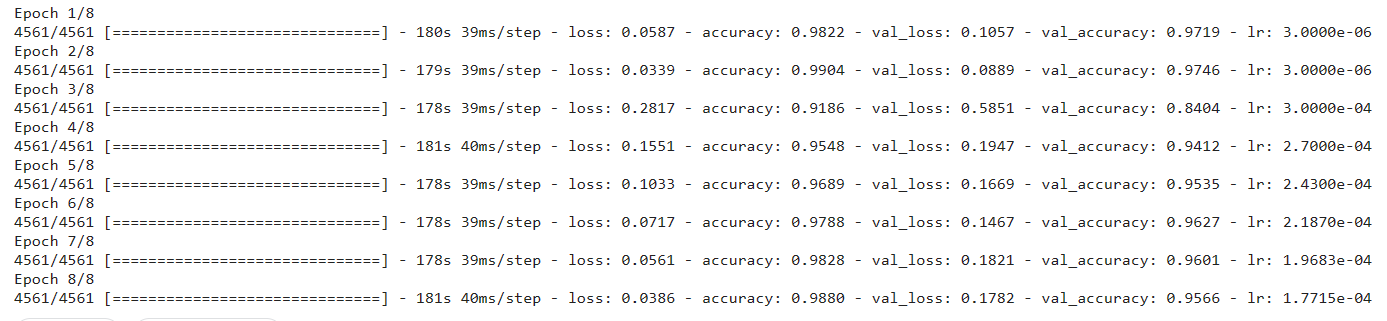

In [ ]:
save_model_dir = os.path.join("..", "models", "mobilenet_sign")
tf_lite_model_filename = os.path.join("..", "models", "tflite_mobilenet.tflite")

if train_new:
    history = model.fit(x=train_x, y=train_y, validation_data=(val_x, val_y), \
        batch_size=batch_size, epochs=10, \
        callbacks=[tensorboard_callback, lr_scheduler_callback])
else:
    model = tf.keras.models.load_model(save_model_dir)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

In [ ]:
pred_x = model.predict(val_x)

In [ ]:
from sklearn.metrics import confusion_matrix
cmt_sklearn = confusion_matrix(val_y, pred_x.argmax(axis = 1))

In [ ]:
def plot_confusion_matrix(cm, labels_name, title):
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('Confusion matrix')

In [ ]:
# print(val_y[1])
plot_confusion_matrix(cmt_sklearn, label_dict.keys())

In [ ]:
print(label_dict)

In [ ]:
for jj in range(4):
    
    my_index = np.random.randint(0, val_x.shape[0])
    
    my_batch = val_x[my_index:my_index+1]
    full_output_data = model(my_batch)

    fig, ax = plt.subplots(1,2, figsize=(4,2))
    
    ax[0].imshow(my_batch[0].numpy())
    ax[0].set_title(f"True \n label: {label_dict[int(val_y[my_index:my_index+1])]}")
    ax[1].imshow(my_batch[0].numpy())
    ax[1].set_title(f"CNN pred. \n label: {label_dict[full_output_data.numpy().argmax()]}")
    
    ax[0].set_yticklabels("")
    ax[0].set_xticklabels("")
    fig.suptitle(f"True label: {label_dict[val_y[my_index].numpy()]}", fontsize=18)
    plt.tight_layout()
    
    plt.savefig(os.path.join(figure_dir, "figure_{figure_count}.png"))
    figure_count += 1
    
    plt.show()

In [ ]:
if os.path.exists(os.path.split(save_model_dir)[0]):
    print(os.path.split(save_model_dir)[0], "does exist")
else:
    os.mkdir(os.path.split(save_model_dir)[0])
    model.save(save_model_dir)
      
    print(os.path.split(save_model_dir))

In [ ]:
if (1):
    # save the keras model in directory save_model_dir 
    # then convert the SavedModel directory to a TF Lite model
    converter = tf.lite.TFLiteConverter.from_saved_model(save_model_dir)
    tf_lite_mobilenet = converter.convert()
else:
    # alternatively, convert from the keras model without saving first
    convert = tf.lit.TFLiteConvert.from_keras_model(model)
    tf_lite_mobilenet = converter.convert()  

# Save the model.
with open(tf_lite_model_filename, "wb") as f:
    f.write(tf_lite_mobilenet)

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tf_lite_model_filename)
my_signature = interpreter.get_signature_runner()

for jj in range(4):
    
    my_index = np.random.randint(0, val_x.shape[0])
    
    my_batch = val_x[my_index:my_index+1]
    
    #interpreter.set_tensor(input_details[0]["index"], my_batch) #tf.cast(my_batch*255, tf.int32))
    
    #output_data = interpreter.get_tensor(output_details[0]["index"])
    t0 = time.time()
    output_data = my_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]
    t1 = time.time()
    full_output_data = model(my_batch)
    t2 = time.time()

    fig, ax = plt.subplots(1,2, figsize=(8,5))
    
    ax[0].imshow(my_batch[0].numpy())
    ax[0].set_title(f"TF Lite pred. ({(t1-t0):.1e} s) \n label: {label_dict[output_data.argmax()]}")
    ax[1].imshow(my_batch[0].numpy())
    ax[1].set_title(f"TF keras pred. ({(t2-t1):.1e} s)\n label: {label_dict[full_output_data.numpy().argmax()]}")
    
    ax[0].set_yticklabels("")
    ax[0].set_xticklabels("")
    fig.suptitle(f"True label: {label_dict[val_y[my_index].numpy()]}", fontsize=18)
    plt.tight_layout()
    
    plt.savefig(os.path.join(figure_dir, "figure_{figure_count}.png"))
    figure_count += 1
    
    plt.show()
    

In [ ]:
def representative_dataset():
    
    for data in tf.data.Dataset.from_tensor_slices((val_x)).batch(1).take(100):
        yield [tf.dtypes.cast(data, tf.float32)]
        
converter = tf.lite.TFLiteConverter.from_saved_model(save_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

tf_lite_mobilenet_quantized = converter.convert()
tf_lite_quant_filename = os.path.join("..", "models", "tflite_mobilenet_quant.tflite")

# Save the model.
with open(tf_lite_quant_filename, "wb") as f:
    f.write(tf_lite_mobilenet_quantized)

In [ ]:
quant_interpreter = tf.lite.Interpreter(model_path=tf_lite_quant_filename)
quant_signature = quant_interpreter.get_signature_runner()

# Get input and output tensors.
input_details = quant_interpreter.get_input_details()
output_details = quant_interpreter.get_output_details()

input_details[0]["dtype"], input_details

In [ ]:
for jj in range(4):
    
    my_index = np.random.randint(0, val_x.shape[0])
    
    my_batch = val_x[my_index:my_index+1]
    
    #interpreter.set_tensor(input_details[0]["index"], my_batch) #tf.cast(my_batch*255, tf.int32))
    
    #output_data = interpreter.get_tensor(output_details[0]["index"])
    t0 = time.time()
    quant_output_data = quant_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]
    t1 = time.time()
    full_output_data = model(my_batch)
    t2 = time.time()

    fig, ax = plt.subplots(1,2, figsize=(8,5))
    
    ax[0].imshow(my_batch[0].numpy())
    ax[0].set_title(f"Quant. Lite pred. ({(t1-t0):.1e} s) \n label: {label_dict[quant_output_data.argmax()]}")
    ax[1].imshow(my_batch[0].numpy())
    ax[1].set_title(f"TF keras pred. ({(t2-t1):.1e} s)\n label: {label_dict[full_output_data.numpy().argmax()]}")
    
    ax[0].set_yticklabels("")
    ax[0].set_xticklabels("")
    fig.suptitle(f"True label: {label_dict[val_y[my_index].numpy()]}", fontsize=18)
    plt.tight_layout()
    
    plt.savefig(os.path.join(figure_dir, "figure_{figure_count}.png"))
    figure_count += 1
    plt.show()
    

In [ ]:
with tf.device('/CPU:0'):

    t3 = time.time()

    for my_index in range(val_x.shape[0]):

        my_batch = val_x[my_index:my_index+1]
        full_output_data = model(my_batch)

    t4 = time.time()
    print("finished with full keras model")

    for my_index in range(val_x.shape[0]):

        my_batch = val_x[my_index:my_index+1]
        output_data = my_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]

    t5 = time.time()
    print("finished with TF Lite model")

    for my_index in range(val_x.shape[0]):

        my_batch = val_x[my_index:my_index+1]
        quant_output_data = quant_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]

    t6 = time.time()
    print("finished with quantized TF Lite model")

msg = f"time elapsed {val_x.shape[0]} samples \n\t keras: {t4-t3:.2f} s \n\t TF Lite: {t5-t4:.2f} s"
msg += f" \n\t Quantized TF Lite: {t6-t5:.3f} s"
print(msg)
"""
finished with full keras model
finished with TF Lite model
finished with quantized TF Lite model
time elapsed 2280 samples 
	 keras: 77.63 s 
	 TF Lite: 13.34 s 
	 Quantized TF Lite: 21.718 s
"""

In [ ]:
correct_keras = 0
correct_lite = 0
correct_quant = 0
total_samples = val_x.shape[0]

for my_index in range(val_x.shape[0]):

    my_batch = val_x[my_index:my_index+1]
    
    full_output_data = model(my_batch)
    output_data = my_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]
    
    quant_output_data = quant_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]
                        
    
    true_label = val_y[my_index].numpy()
    
    correct_keras += 1.0 * (full_output_data.numpy().argmax() == true_label)
    correct_lite += 1.0 * (output_data.argmax() == true_label)
    correct_quant += 1.0 * (quant_output_data.argmax() == true_label)
    
accuracy_quant = correct_quant / total_samples
accuracy_lite = correct_lite / total_samples
accuracy_keras = correct_keras / total_samples

msg = f"Validation accuracies "
msg += f"\n\t keras {accuracy_keras:.4f}"
msg += f"\n\t TF Lite {accuracy_lite:.4f}"
msg += f"\n\t Quantized TF Lite {accuracy_quant:.4f}" 

print(msg)
"""
accuracies 
	 keras 0.9851
	 TF Lite 0.9851
	 Quantized TF Lite 0.9855
"""

In [ ]:
correct_keras = 0
correct_lite = 0
correct_quant = 0
total_samples = test_x.shape[0]

for my_index in range(test_x.shape[0]):

    my_batch = test_x[my_index:my_index+1]
    
    full_output_data = model(my_batch)
    output_data = my_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]
    
    quant_output_data = quant_signature(**{"mobilenet_1.00_128_input": my_batch})["dense_2"]
                        
    
    true_label = test_y[my_index].numpy()
    
    correct_keras += 1.0 * (full_output_data.numpy().argmax() == true_label)
    correct_lite += 1.0 * (output_data.argmax() == true_label)
    correct_quant += 1.0 * (quant_output_data.argmax() == true_label)
    
accuracy_quant = correct_quant / total_samples
accuracy_lite = correct_lite / total_samples
accuracy_keras = correct_keras / total_samples

msg = f"Test accuracies "
msg += f"\n\t keras {accuracy_keras:.4f}"
msg += f"\n\t TF Lite {accuracy_lite:.4f}"
msg += f"\n\t Quantized TF Lite {accuracy_quant:.4f}" 

print(msg)
"""
Test accuracies 
	 keras 0.9882
	 TF Lite 0.9882
	 Quantized TF Lite 0.9877
"""